# Data Visualization: A Walkthrough in

This notebook is a follow-up to the [visualization walkthrough](http://dhuppenkothen.github.io/data-visualization-tutorial/12-walkthrough/index.html). Instead of matplotlib and seaborn, we are 
going to use the Python library [altair](https://altair-viz.github.io). 

Matplotlib has been enormously successful at making Python viable as a standard language for scientific computing and data analysis. In recent years, however, there have been new developments both in terms of computation and in the data visualization world, and alternatives have emerged. 

As we've mentioned previously, [d3.js](https://d3js.org) is a very powerful library to develop interactive visualizations using JavaScript. Because D3.js is pretty labour-intensive (and requires you to know some JavaScript), groups have started developing alternatives and extensions, some based on D3, some not, to make interactive visualization design more accessible to non-experts. For an overview of the different options in Python, [PyViz](https://pyviz.org) is a great resource to explore! 

One important note is that many of the packages involved are still fairly young, and so the library and the syntax might change quite frequently. Some are focused specifically on dealing with very large data sets (e.g. [DataShader](https://www.github.com/pyviz/datashader)), others don't handle large data sets well at the moment. 

So using any of these packages carries a bit of a risk: they might not be super well documented, or they might be missing features, or their interface might change over the course of a year or so. If you're willing to take that risk, however, you can do pretty amazing things. It's also fair to say that most of them are **open-source projects**, that is, they thrive around a community of volunteers that help improve them. **That could be you!**. When you find a bug, [file an issue](https://guides.github.com/features/issues/). When there's a feature missing you really need, contact them (also via an issue or mailing list or whatever means of communication they use). Many of those communities of developers are friendly and very interested in your feedback!

### Altair, Vega-Lite and Vega

In this version of the walkthrough, we're going to use a library called [Altair](https://altair-viz.github.io). Altair is also part of a larger eco-system of libraries, and based on two lower-level libraries called [Vega](https://vega.github.io) and [Vega-Lite](https://vega.github.io/vega-lite/). These two software packages, created at the [Interactive Data Lab](https://idl.cs.washington.edu) at the University of Washington, specify what is called a *data visualization grammar*. Like the grammar of a language, Vega allows you to describe the different components of visualization, as well as their relationships to one another and their relationships to the data you're trying to visualize. 

This type of visualization grammar, like others of its kind, has one important advantage over `matplotlib`: it's much less confusing and much more clearly structured! matplotlib was originally designed to mimic the plotting behaviour of [matlab](https://www.mathworks.com/products/matlab.html?s_tid=hp_products_matlab). But it's not writte in matlab, it's written in Python. So the developers essentially created two interfaces, one that looks like matlab, and one that follows more typically Pythonic structures. As a result, there are usually several ways to do the same thing, which don't always play well together, and this can get pretty confusing!

One issue with Vega is that you have to specify *everything*: you have to tell it that there are two axes, one horizontal labelled "x", one vertical labelled "y", in which direction they point, what the scale for them is, how many tick marks it should have, etc. That gets very tedious very quickly if you just want to quickly make a scatter plot! On the other hand, if you're trying to make a super specific custom visualization, that freedom can come in very handy!

So in order to make it easier for researchers to do standard things like bar chars and line charts, the developers created *Vega-Lite*, a much simpler interface on top of Vega that will automatically try to make intelligent choices for its axes. 

So this is great, but both Vega and Vega-Lite require you to specify your chart in [json](https://www.json.org). While json is great, it's not the most readable of formats (and there are *so many curly braces!!!*). *Altair* is essentially a Python interface to Vega-Lite that allows you to specify Vega-Lite charts in Python. One cool thing is that you can always export both Vega and Vega-Lite json specifications generated from your Python code. This can come in super handy if you're trying to customize your plot in a way that Altair doesn't allow, but Vega does. 

### A Quick Note on Versions

Because Altair is a direct translation of Vega-Lite, it usually lags behind the most recent release of Vega-Lite by a few weeks. Keep in mind that when new features get added to Vega-Lite, they will not be immediately available in Altair, and so the two documentations might be out of synch.

### Altair in your Notebook

You can follow the [installation instructions](https://altair-viz.github.io/getting_started/installation.html) to get altair running in your notebook, JupyterLab or interface of choice.

**Important**: Because of the notebook-to-markdown conversion, the interactive plots in this notebook **will not be interactive** on the website. In order to check out the interactivity, please 

Once you've done that, let's give it a quick test using one of the 
standard data sets and the code snippet from the Altair website:

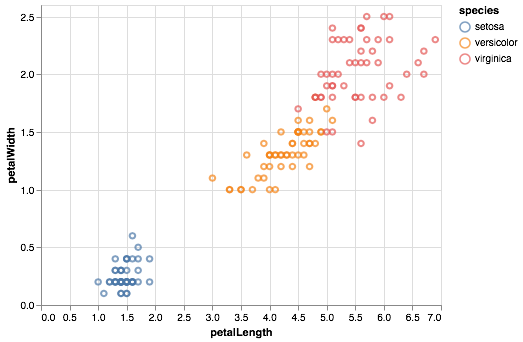

In [1]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)


Ideally, this should display a scatter plot of the petal length of different species of Iris flowers.

We're now ready to get started with our own chart.

As a reminder, here's the original data visualization:

![original infographic](../fig/infographic.png)

Some internet business terminology to keep track of (or not):
* "ROI" = "Return on Investment", i.e. how much profit you get back after spending some money on advertising
* "SEO" = "Search Engine Optimization", the process of tweaking your website so that it appears far on top in search engines like Google or DuckDuckGo
* "PPC" = "Pay-per-click" is an internet advertising model used to drive traffic to websites, in which an advertiser pays a publisher (typically a search engine, website owner, or a network of websites) when the ad is clicked (as per [wikipedia](https://en.wikipedia.org/wiki/Pay-per-click)
* "PR" = "Public Relations", is a strategic communication process that builds mutually beneficial relationships between organisations and the public, as per [this website](https://publicrelationssydney.com.au/the-difference-between-advertising-and-pr/)
* "Direct Mail": good old-fashioned snail mail advertising you get in the post
* "Online Media Buys": refers to matching an advertisement to an intended audience, I think. See also [wikipedia](https://en.wikipedia.org/wiki/Media_buying)

**Exercise**: Write down short statements regarding the following questions
* When you first looked at the figure, what did you first study: the visualization or the text?
* What key point do you think the data visualzation is meant to convey?
* How well does the type of data visualization and its physical appearance (form, colours, contrast etc) convey the information given in the text?
* What alternative forms might you choose to represent the data?

**Note**: This a data visualization exercise, not one in internet marketing. If some of those terms don't make sense do you, that's totally okay. If you can't figure out what the figure is trying to tell you (honestly, I'm not sure, either), that's fine, too! For a data visualization exercise like this, you can totally make up a message you want to bring across (in fact, I'm going to do exactly that further down below) and run with it. In reality, we're scientists, however, and we don't make up stories in general. In your work, you might be faced with two situations:
* *Exploratory data analysis*: Often, data visualization is a key part of exploratory data analysis, where you encounter a new data set and you don't know yet what's in there. For example, data from a new telescope might contain systematic effects that lead to funny-looking data. Visualizing the data sets helps you figure out what your data looks like, what biases might be in it. 
* *Explaining a result with a visualization*: In our scientific (or non-scientific!) publications, we often use visualizations to explain a scientific result. In these cases, we already *know* the story, our scientific result, so in this case our task is to make sure that our visualization (1) represents the data accurately (everything else would be lying), and (2) that it allows the viewer to understand your results and how you've arrived there. 

## Getting the Data

As with the walkthrough, we first need to get the data in a machine-readable format from the figure. 

For that, we're also going to need `numpy` and `pandas`:

In [2]:
import numpy as np
import pandas as pd

Now let's store our data in a `pandas.DataFrame`. We'll do this a little differently from the previous walkthrough using matplotlib:

In [3]:
ad_type = ["SEO", "Email", "PPC",  "PR", "Direct Mail", "OMB"]
roi = [68.9, 56.7, 52.4, 48.5, 37.4,  19.9]

data = {"adtype":ad_type, "roi":roi}

Here we've created two lists, one with the type of advertising, the other with the values for return on investment, and then passed both to a dictionary. We can now store these in a DataFrame: 

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,adtype,roi
0,SEO,68.9
1,Email,56.7
2,PPC,52.4
3,PR,48.5
4,Direct Mail,37.4
5,OMB,19.9


Altair can work with DataFrames, but you could also save your data to either a json file or a csv (comma-separated values) file, and then pass it the file name and location (or URL) of the file. Pandas can write out both, which can sometimes help keeping the size of your notebook smaller.

But in this case, let's use the DataFrame.

### (Bar) Charts in Altair

All figures you generate in Altair follow a similar convention, and all are objects of class `Chart()`. `Chart()` usually takes your data as an input, and then you'll use *methods* (functions that apply to a specific class of object) to specify what you actually want to plot.

Let's give this a try:

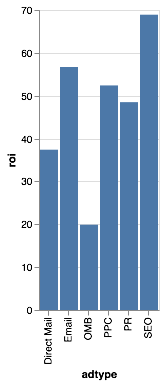

In [6]:
alt.Chart(df).mark_bar().encode(
    x = "adtype:O",
    y = "roi:Q"
)

What have we done? The syntax might look a little funny, but we've essentially called a number of methods on the `Chart()` class to tell it what to do. One thing we've used is the `mark_bar()` method. This tells Altair that the plot it should produce is a bar chart. Then we've used the `encode` method to actually tell it what values to plot. 

You pretty much *always* have to call the `encode` method somewhere: you could pass in a DataFrame with many more columns (for example a column called "cost"), and then Altair wouldn't know which ones to use and which ones to leave out. In the case above, we've told it to put "adtype" on the x-axis and "roi" on the y-axis. The syntax `:O` and `:Q` after each tells Altair that "adtype" contains ordinal data (i.e. separate, distinct categories), and "roi" contains quantitative data (i.e. continuous numbers).

You might also notice that Altair has made some default choices about the dimensions of the chart, the units on the y-axis, the grid lines in the background, and so on. It also automatically adds axis labels when it has an idea of what labels to give it (it chose the column labels from our DataFrame in this case).

That chart looks great, but it's a bit squashed. We can un-squash it by setting the size of the chart:

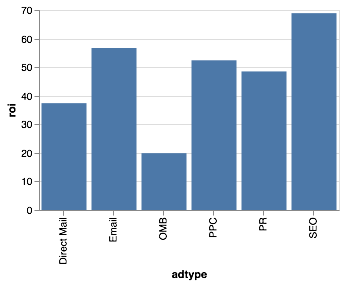

In [7]:
alt.Chart(df).mark_bar().encode(
    x = "adtype:O",
    y = "roi:Q"
).properties(
    width=300,
    height=200
)

Looks better, doesn't it? Unlike seaborn, Altair automatically gives the bars the same colour. You can specify the colour in two different ways. You can pass it directly to the `mark_bar()` method:




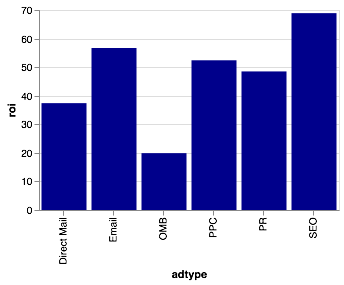

In [8]:
alt.Chart(df).mark_bar(color="darkblue").encode(
    x = "adtype:O",
    y = "roi:Q"
).properties(
    width=300,
    height=200
)

Any [html colour code](https://htmlcolorcodes.com) will work, along with any hexadecimal colour code you can generate on that website or others.

The other cool thing you can do is to do something called *conditional formatting*. Let's say we want to colour online methods of advertising and offline methods of advertising separately. Let's add a column to our DataFrame to do exactly that:

In [9]:
df["online"] = ["yes", "yes", "yes", "no", "no", "yes"]

In [10]:
df

,adtype,roi,online
0,SEO,68.9,yes
1,Email,56.7,yes
2,PPC,52.4,yes
3,PR,48.5,no
4,Direct Mail,37.4,no
5,OMB,19.9,yes


I've told it that all but PR and Direct Mail are online versions. Instead of passing "color" to the `mark_bar()` method, we can also pass it to the `encoding()` method. Let's see what happens when we do that:

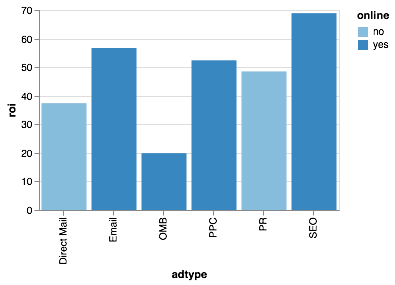

In [11]:
alt.Chart(df).mark_bar().encode(
    x = "adtype:O",
    y = "roi:Q",
    color= "online:O"
).properties(
    width=300,
    height=200
)

It has now coloured the two bars differently, and it has automatically added a legend! 

There are other values you can choose. For example, in a scatter plot, you could use `size` as an encoding channel to vary the size of the points as a function of some property of each point. You can also encode `opacity`, i.e. how transparent a plot element is:

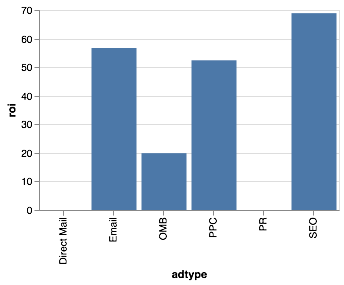

In [35]:
alt.Chart(df).mark_bar().encode(
    x = "adtype:O",
    y = "roi:Q",
    opacity= "online:O"
).properties(
    width=300,
    height=200
)

Here, the colour remains the same, but offline methods are less opaque than online methods. For a list of all the different possible encodings, and how to use them, you can look at the [relevant Altair documentation](https://altair-viz.github.io/user_guide/encoding.html).

**Warning**: Being able to encode many different properties on the same plot doesn't mean it's a good idea to do so! People are unlikely to really understand more than 2-3 different dimensions on a plot. Wherever possible, try to use different encodings to *reinforce* important data properties (for example, you could use a "color" and "size" encoding using the *same data property*, so that for example in your scatter plot marks that are bigger will also be blue, and marks that are smaller will also be green). This helps viewers understand the structure of your data better.

We might not like Altair's defaults for colour and opacity, so let's change it. We can do that by using the `condition` function like so:

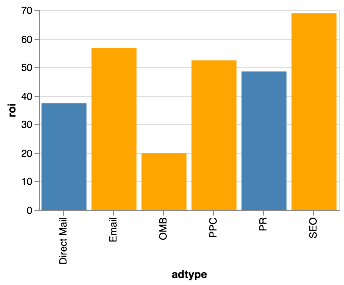

In [13]:
alt.Chart(df).mark_bar().encode(
    x = "adtype:O",
    y = "roi:Q",
    color= alt.condition(
        alt.datum.online == "yes", 
        alt.value("orange"),
        alt.value("steelblue"))
).properties(
    width=300,
    height=200
)

Here, we've told it to plot the online methods in orange, and then offline methods in blue. the `condition()` function takes as first argument a condition, here `alt.datum.online == "yes"`, which basically says "take the data points in column "online" and find all rows for which the value is "yes". The next two arguments specify what it should do if this condition is true (here, use an orange colour) and what it should do if the condition is false (use a blue colour). The `condition` function is pretty powerful and useful in Altair, and often used in interactive visualizations, so it's worth understanding how it works! You can find more information in the [Interaction section of the documentation](https://altair-viz.github.io/user_guide/interactions.html). 

### Specifying Axes

What I currently don't like about our plot are the axis labels. The column names we gave are pretty descriptive and short, so useful when you have to type them many times in a data analysis, but if you put them in your paper, few people would understand what they mean. 

Let's give our plot some more descriptive axis labels. For this, you'll have to know that the encoding syntax we used above, where we wrote `x="adtype:Q"` is a shorthand for a longer command. The shorthand is useful for quick plots where you don't care about anything but the defaults, but when you want to specify more details, you might want to use a little bit more verbose syntax:

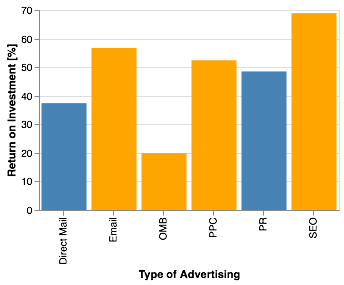

In [17]:
alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising"),
    y = alt.Y("roi:Q", title="Return on Investment [%]"),
    color= alt.condition(
        alt.datum.online == "yes", 
        alt.value("orange"),
        alt.value("steelblue"))
).properties(
    width=300,
    height=200
)

Here, we've used the `alt.X()` and `alt.Y()` functions to specify more detail of our x- and y-axes, in this case by giving it the `title` keyword with more descriptive titles.

### Adding Text

In the previous walkthrough, we wanted to highlight the "Email" bar and give it text. We can do this in Altair, too, using a combination of the `condition()` function we've seen before and the `mark_text` property. 

For this, you should also know that it is possible to *layer* charts on top of each other. In our case, we're going to layer a `mark_bar` element and a `mark_text` element on top of each other in the same chart. 

To do this, we're going to save our marks in *variables*. So far, we've just typed the commands directly into the command field, and the notebook has automatically rendered the result. However, we can also save it in a variable of whatever name we choose, and then have the notebook render it later when we need it to.

So first, let's generate our old bar chart, and let's highlight "Email" using our conditional:

In [15]:
roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising"),
    y = alt.Y("roi:Q", title="Return on Investment [%]"),
    color= alt.condition(
        alt.datum.adtype == "Email", 
        alt.value("darkred"),
        alt.value("lightgrey"))
).properties(
    width=300,
    height=200
)


Executing that cell did not plot anything, because so far, we've only saved the chart specification in a variable, without telling the notebook to actually render it.

Let's now use `mark_text` to draw our numbers:

In [40]:
roi_text = roi_bars.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Nudges text up so it doesn't appear on top of the bar
    color="darkred"
).encode(
    text="roi:Q",
    opacity= alt.condition(
        alt.datum.adtype == "Email", 
        alt.value(1.0),
        alt.value(0.0))
)

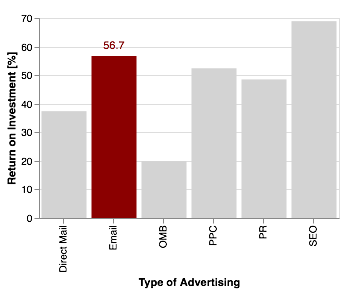

In [41]:
roi_bars + roi_text

That almost looks like our matplotlib plot!

As a last step, we'd like to sort the bar chart by height in a descending order. We can use this by using the "sort" property on `alt.Y`:

In [46]:
roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",  # The field to use for the sort
                    order="descending"  # The order to sort in
        )

),
    y = alt.Y("roi:Q", 
              title="Return on Investment [%]"
),
    color= alt.condition(
        alt.datum.adtype == "Email", 
        alt.value("darkred"),
        alt.value("lightgrey"))
).properties(
    width=300,
    height=200
)

roi_text = roi_bars.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Nudges text up so it doesn't appear on top of the bar
    color="darkred"
).encode(
    text="roi:Q",
    opacity= alt.condition(
        alt.datum.adtype == "Email", 
        alt.value(1.0),
        alt.value(0.0))
)


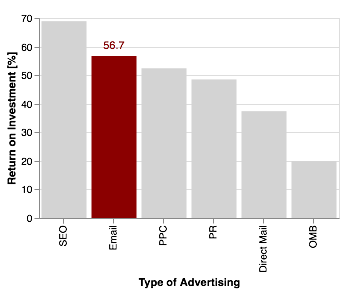

In [47]:
roi_bars + roi_text

Allright, that looks pretty similar to our matplotlib version. 

However, one of the great things about altair is that it's pretty easy to include interactivity. For a simple 
zooming functionality, all you need to do is add `.interactive()`:

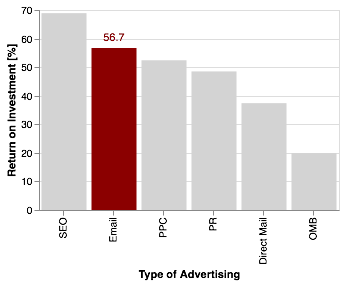

In [48]:
(roi_bars + roi_text).interactive()

Granted, zooming around in a bar chart isn't particularly satisfying, so let's do something more fun.
For example, perhaps we don't want to highlight the bar labelled "E-mail", but highlight a bar whenever someone clicks on it.

You can implement that using the `selection` function. We'll use the "selection" function to determine the colour:

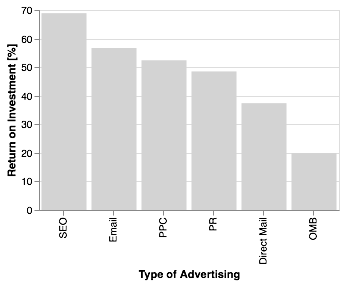

In [62]:
# define a selector of type "single" (only a single element active at a time)
# and define what behavious it should do if nothing is clicked:
# if "all" is selected, all bars will be dark red by default until you click on one
# if "none" is selected, all bars will be lightgrey until you click on one
selector = alt.selection(type="single", empty='none')

roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",
                    order="descending"
        )
),
    y = alt.Y("roi:Q", 
              title="Return on Investment [%]"
),
    color= alt.condition(
        selector, # replace the previous condition with the selector
        alt.value("darkred"),
        alt.value("lightgrey"))
).add_selection(
    selector  # Add the selector here so that the chart knows to use it
).properties(
    width=300,
    height=200
)

roi_bars

Clicking on each bar should highlight that bar in red.

We can also do an interval selection, where you drag a window and it will mark all 
bars within that window:

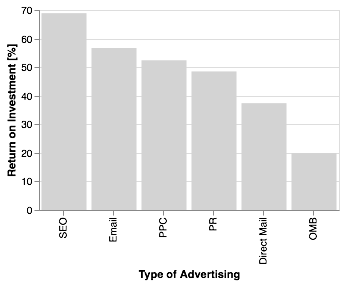

In [65]:
brush = alt.selection(type="interval", empty="none", encodings=['x'])


roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",
                    order="descending"
        )
),
    y = alt.Y("roi:Q", 
              title="Return on Investment [%]"
),
    color= alt.condition(
        brush, # replace the previous condition with the selector
        alt.value("darkred"),
        alt.value("lightgrey"))
).add_selection(
    brush  # Add the selector here so that the chart knows to use it
).properties(
    width=300,
    height=200
)

roi_bars

This should allow you to drag your mouse across the chart and highlight bars. The `encodings` keyword in the `brush` function binds the rectangle to the x-axis (that is, you can only select along the x-axis, while you always select all of the y-axis). 

**Exercise**: Try leaving out the `encodings` keyword or changing it to `y`. What happens?

We can also have it highlight a bar when we just run our mouse over it, without clicking. For that, we're going to use our single selection again:

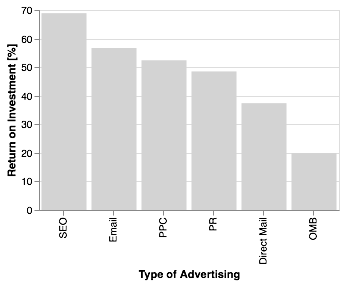

In [69]:
# define a selector of type "single" (only a single element active at a time)
# and define what behavious it should do if nothing is clicked:
# if "all" is selected, all bars will be dark red by default until you click on one
# if "none" is selected, all bars will be lightgrey until you click on one
selector = alt.selection(type="single", empty='none', on='mouseover')

roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",
                    order="descending"
        )
),
    y = alt.Y("roi:Q", 
              title="Return on Investment [%]"
),
    color= alt.condition(
        selector, # replace the previous condition with the selector
        alt.value("darkred"),
        alt.value("lightgrey"))
).add_selection(
    selector  # Add the selector here so that the chart knows to use it
).properties(
    width=300,
    height=200
)

roi_bars

Maybe a useful thing would be if the plot also displayed some information every time you mouse over a bar. You can do this by adding a `tooltip` attribute to your `encode` method:

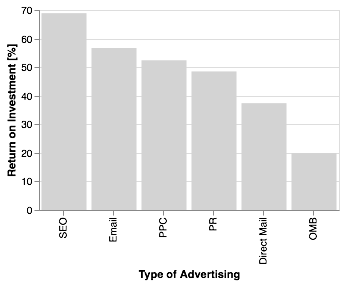

In [75]:
selector = alt.selection(type="single", empty='none', on='mouseover')

roi_bars = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",
                    order="descending"
        )
),
    y = alt.Y("roi:Q", 
              title="Return on Investment [%]"
),
    color= alt.condition(
        selector, 
        alt.value("darkred"),
        alt.value("lightgrey")),
        tooltip=["roi", "online"] # display ROI and online properties on mouseover
).add_selection(
    selector
).properties(
    width=300,
    height=200
)

roi_bars

In the last step, let's make a plot with two panels! 

For this, we're going to invent another data sets: for each of our types of advertising, 
we're going to invent a cost in millions of dollars for a hypothetical company. 
Presumably, even though something has a high ROI, it might still not be feasible if it 
costs more than a company can afford. 

Let's come up with some values:

In [77]:
df.adtype

0            SEO
1          Email
2            PPC
3             PR
4    Direct Mail
5            OMB
Name: adtype, dtype: object

In [78]:
costs = [1.2, 0.4, 1.5, 2.2, 8.7, 0.3]

df["costs"] = costs

We are now going to make two bar charts, and then link them together. Let's do this first without all the fancy formatting for clarity:

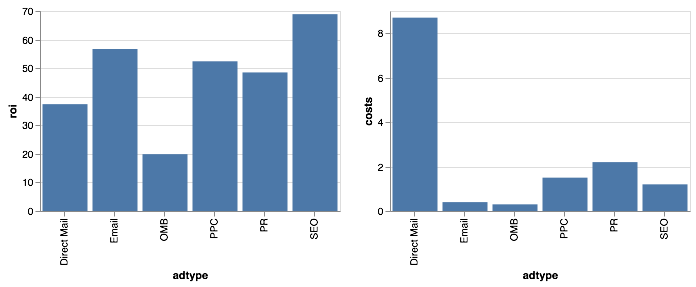

In [84]:
base_chart = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype")
).properties(
    width=300,
    height=200
)

base_chart.encode(y=alt.Y("roi")) | base_chart.encode(y=alt.Y("costs"))

Making multi-panel plots is as simple as doing something like `Chart1 | Chart2`: the `|` symbol tells altair that it should make a two-panel plot. For a vertically stacked multi-panel chart, you can use the `&` symbol. 

We now want to add our properties and selections back in, and we want to make sure the same is selected on both sides:

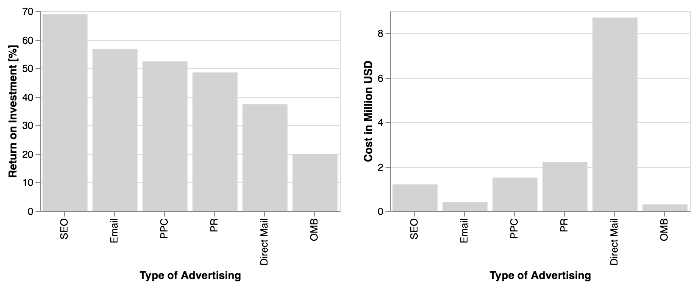

In [86]:
selector = alt.selection(type="single", empty='none', on='click')

base_chart = alt.Chart(df).mark_bar().encode(
    x = alt.X("adtype:O", title="Type of Advertising",
               sort = alt.EncodingSortField(
                    field="roi",
                    order="descending"
        )
),
    color= alt.condition(
        selector, 
        alt.value("darkred"),
        alt.value("lightgrey")),
        tooltip=["roi", "costs", "online"] # display ROI and online properties on mouseover
).add_selection(
    selector
).properties(
    width=300,
    height=200
)


base_chart.encode(y = alt.Y("roi:Q", title="Return on Investment [%]")) | base_chart.encode(y = alt.Y("costs:Q", title="Cost in Million USD"))


Now when you click on any of the bars on either side, it'll highlight the corresponding bar on the other side. It becomes pretty easy to see that Direct Mail is a terrible idea (very expensive, because you have to actually produce and send physical letters), and that SEO and e-mail are cheap and effective (of course, we've just made that up!). 

And that's it for this tutorial! I very much encourage you to look at the ever-growing [example gallery](https://altair-viz.github.io/gallery/index.html) on the Altair website, and the Altair [documentation](https://altair-viz.github.io/index.html) more generally, which is great. Have fun exploring!